## Image Classification Using Convolutional Neural Network (CNN)

###  We will be classifying images in the cifar10 dataset from TensorFlow Keras. There are a total of 10 classes as shown below. 

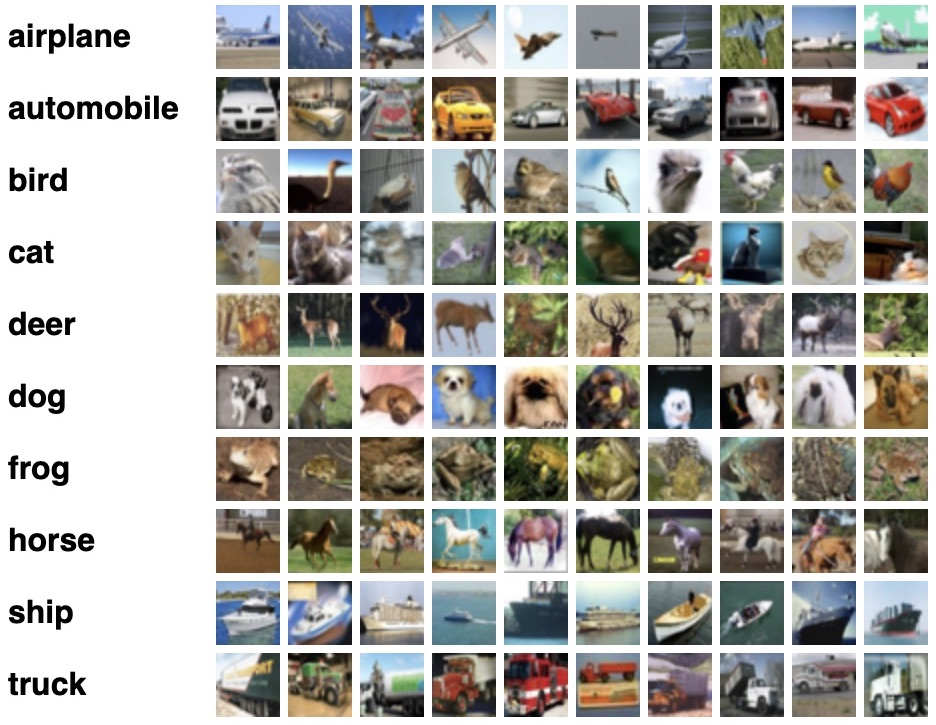

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
# To import dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape               # There are 5000 training images 

(50000, 32, 32, 3)

In [4]:
X_test.shape               # There are 1000 test images 

(10000, 32, 32, 3)

### Example of image in the dataset

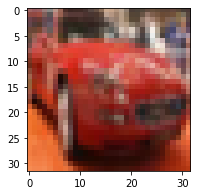

In [5]:
plt.figure(figsize = (15,3))
plt.imshow(X_train[5])             # This is an image of an automobile 

### A function to plot images in the dataset 

In [6]:
# There are ten classes that images can fall into
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
Y_train            # The values in the array correspond with an image classification 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
Y_train.shape         # Y_train is a 2D array. We need a 1D array 

(50000, 1)

In [9]:
# To reshape Y_train
Y_train = Y_train.reshape(-1,)
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
# To reshape Y_test
Y_test = Y_test.reshape(-1,)

In [11]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])                  

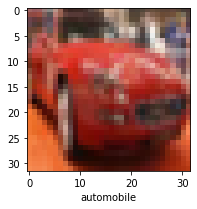

In [12]:
plot_sample(X_train, Y_train, 5)

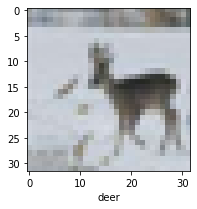

In [13]:
plot_sample(X_train, Y_train, 20)

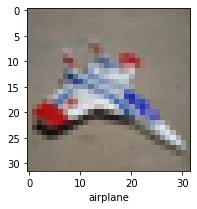

In [14]:
plot_sample(X_train, Y_train, 30)

### To normalise pixel values 

In [15]:
# The pixel value of every image in the dataset is between 0 and 255.
# To normalize pixel values we will be dividing by 255 to get a value between 0 and 1.

X_train = X_train / 255
X_test = X_test / 255

### ANN model to classify images in the dataset 

In [16]:
ANN_model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ANN_model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


ANN_model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 217s 138ms/step - loss: 1.9321 - accuracy: 0.3013
Epoch 2/5
1563/1563 [==============================] - 176s 112ms/step - loss: 1.6531 - accuracy: 0.4148
Epoch 3/5
1563/1563 [==============================] - 189s 121ms/step - loss: 1.5558 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 190s 122ms/step - loss: 1.4884 - accuracy: 0.4754
Epoch 5/5
1563/1563 [==============================] - 196s 126ms/step - loss: 1.4389 - accuracy: 0.4954


### The accuracy rate of the ANN model after 5 epochs is 49.5 %

In [17]:
# ANN model classification report 

Y_pred = ANN_model.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test, Y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.41      0.50      1000
           1       0.77      0.33      0.46      1000
           2       0.37      0.38      0.38      1000
           3       0.40      0.20      0.26      1000
           4       0.45      0.39      0.42      1000
           5       0.28      0.59      0.38      1000
           6       0.57      0.46      0.51      1000
           7       0.47      0.63      0.54      1000
           8       0.54      0.68      0.60      1000
           9       0.54      0.58      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



### CNN model to classify images in the dataset 

In [18]:
CNN_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])


CNN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CNN_model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.7373 - accuracy: 0.3666
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1783 - accuracy: 0.5825
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0242 - accuracy: 0.6427
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9397 - accuracy: 0.6747
Epoch 5/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8729 - accuracy: 0.6963


### The accuracy rate of the CNN model after 5 epochs is  69.3 %  which is a significant improvement over the ANN model. 

In [19]:
# CNN model classification report 

Y_pred = CNN_model.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test, Y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.83      0.73      0.78      1000
           2       0.70      0.40      0.51      1000
           3       0.56      0.43      0.48      1000
           4       0.55      0.68      0.61      1000
           5       0.54      0.66      0.59      1000
           6       0.76      0.76      0.76      1000
           7       0.63      0.78      0.70      1000
           8       0.77      0.78      0.78      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

